In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data sets
tienda = pd.read_csv('../raw_data/DIM_TIENDA.csv')
venta = pd.read_csv('../raw_data/Venta.csv')
meta = pd.read_csv('../raw_data/Meta_venta.csv')

In [4]:
tienda.sample(5)

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
27,296,1,C,Hogar,86.00,13,5,25.66105,-100.25257,Clásico,UT_GAS_URBANA,TRAIN
150,559,1,C,Hogar,92.18,13,8,25.72444,-100.15672,Hogar Reunión,UT_DENSIDAD,TRAIN
508,657,4,C,Base,0.00,0,0,25.62437,-100.06568,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN
695,369,5,C,Hogar,95.22,13,9,25.76323,-100.14641,Hogar Reunión,UT_DENSIDAD,TRAIN
785,21,6,CD,Hogar,99.00,9,0,25.18824,-99.80819,Barrio Competido,UT_DENSIDAD,TRAIN


In [5]:
venta.sample(5)

,TIENDA_ID,MES_ID,VENTA_TOTAL
15512,989,202306,1386020.73
15899,628,202312,604965.83
3479,312,202306,1802830.69
13177,564,202311,962409.00
11775,672,202312,1163919.75


In [6]:
# Drop MES_ID and merge ventas with tiendas

df_raw = tienda.merge(venta, on='TIENDA_ID', how='left')
df_raw.sample(10)

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MES_ID,VENTA_TOTAL
16828,47,6,C,Hogar,79.57,12,6,24.86497,-99.56100,Hogar Reunión,UT_TRAFICO_PEATONAL,TRAIN,202307.0,1047615.82
18095,226,6,CD,Receso,135.72,10,0,24.85948,-99.56629,Oficinistas,UT_TRAFICO_PEATONAL,TRAIN,202401.0,1458115.98
15272,636,5,C,Hogar,118.07,13,0,25.79726,-100.05891,Parada Técnica,UT_DENSIDAD,TRAIN,202303.0,853831.17
9494,149,3,AB,Base,0.00,13,0,25.60031,-100.26577,Hogar Reunión,UT_DENSIDAD,TRAIN,202404.0,1316875.36
14965,773,5,C,Hogar,94.84,15,0,25.80301,-100.22922,Hogar Reunión,UT_DENSIDAD,TRAIN,202402.0,1224423.57
16551,57,6,C,Receso,122.02,12,11,25.24865,-99.97038,Parada Técnica,UT_CARRETERA_GAS,TRAIN,202411.0,890199.62
10618,689,4,C,Hogar,124.11,13,0,25.65760,-100.19825,Hogar Reunión,UT_DENSIDAD,TRAIN,202412.0,550330.77
18713,595,6,C,Base,0.00,13,0,25.28658,-100.03171,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN,202404.0,1427559.27
9937,56,4,D,Hogar,98.35,12,7,25.67128,-100.08602,Hogar Reunión,UT_DENSIDAD,TRAIN,202304.0,488533.32
8649,252,3,B,Receso,120.80,15,0,25.63210,-100.27243,Oficinistas,UT_TRAFICO_VEHICULAR,TRAIN,202312.0,956557.06


In [7]:
df_baking = df_raw.copy()

# Lower column names 

df_baking.columns = df_baking.columns.str.lower()
df_baking.columns

Index(['tienda_id', 'plaza_cve', 'nivelsocioeconomico_des', 'entorno_des',
       'mts2ventas_num', 'puertasrefrig_num', 'cajonesestacionamiento_num',
       'latitud_num', 'longitud_num', 'segmento_maestro_desc',
       'lid_ubicacion_tienda', 'dataset', 'mes_id', 'venta_total'],
      dtype='object')

In [8]:
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19256 entries, 0 to 19255
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tienda_id                   19256 non-null  int64  
 1   plaza_cve                   19256 non-null  int64  
 2   nivelsocioeconomico_des     19256 non-null  object 
 3   entorno_des                 19256 non-null  object 
 4   mts2ventas_num              19256 non-null  float64
 5   puertasrefrig_num           19256 non-null  int64  
 6   cajonesestacionamiento_num  19256 non-null  int64  
 7   latitud_num                 19256 non-null  float64
 8   longitud_num                19256 non-null  float64
 9   segmento_maestro_desc       19158 non-null  object 
 10  lid_ubicacion_tienda        19256 non-null  object 
 11  dataset                     19256 non-null  object 
 12  mes_id                      19253 non-null  float64
 13  venta_total                 192

In [9]:
drop_columns = ['tienda_id', 'plaza_cve', 'dataset', 'mes_id']

df_baking = df_baking.drop(columns=drop_columns)

In [10]:
df_baking['lid_ubicacion_tienda'].value_counts()

lid_ubicacion_tienda
UT_DENSIDAD             10739
UT_TRAFICO_VEHICULAR     4338
UT_GAS_URBANA            2127
UT_CARRETERA_GAS         1153
UT_TRAFICO_PEATONAL       899
Name: count, dtype: int64

In [11]:
cat_columns = ['nivelsocioeconomico_des', 'entorno_des', 'segmento_maestro_desc', 'lid_ubicacion_tienda']

df_baking[cat_columns] = df_baking[cat_columns].astype('category')

df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19256 entries, 0 to 19255
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   nivelsocioeconomico_des     19256 non-null  category
 1   entorno_des                 19256 non-null  category
 2   mts2ventas_num              19256 non-null  float64 
 3   puertasrefrig_num           19256 non-null  int64   
 4   cajonesestacionamiento_num  19256 non-null  int64   
 5   latitud_num                 19256 non-null  float64 
 6   longitud_num                19256 non-null  float64 
 7   segmento_maestro_desc       19158 non-null  category
 8   lid_ubicacion_tienda        19256 non-null  category
 9   venta_total                 19253 non-null  float64 
dtypes: category(4), float64(4), int64(2)
memory usage: 978.9 KB


In [12]:
df_baking.isna().sum()

nivelsocioeconomico_des        0
entorno_des                    0
mts2ventas_num                 0
puertasrefrig_num              0
cajonesestacionamiento_num     0
latitud_num                    0
longitud_num                   0
segmento_maestro_desc         98
lid_ubicacion_tienda           0
venta_total                    3
dtype: int64

In [13]:
df_baking[df_baking['venta_total'].isna()] # Can be dropped

df_baking = df_baking.dropna(subset=['venta_total'])

df_baking.isna().sum()

nivelsocioeconomico_des        0
entorno_des                    0
mts2ventas_num                 0
puertasrefrig_num              0
cajonesestacionamiento_num     0
latitud_num                    0
longitud_num                   0
segmento_maestro_desc         97
lid_ubicacion_tienda           0
venta_total                    0
dtype: int64

In [37]:
meta = {
    'Base': 480000,
    'Hogar': 490000, 
    'Peatonal': 420000, 
    'Receso': 516000
}

df_baking['meta_objetivo'] = df_baking['entorno_des'].map(meta).astype('int')

df_baking['cumple_meta'] = df_baking['venta_total'] >= df_baking['meta_objetivo']

df_baking.sample(10)

,nivelsocioeconomico_des,entorno_des,mts2ventas_num,puertasrefrig_num,cajonesestacionamiento_num,latitud_num,longitud_num,segmento_maestro_desc,lid_ubicacion_tienda,venta_total,meta_objetivo,cumple_meta
7106,C,Base,132.00,12,10,26.39773,-99.03788,Hogar Reunión,UT_GAS_URBANA,1170399.53,480000,True
14034,C,Hogar,115.79,13,11,25.81966,-100.25688,Hogar Reunión,UT_DENSIDAD,1176473.09,490000,True
12863,C,Hogar,0.00,13,0,25.66378,-100.12145,Hogar Reunión,UT_DENSIDAD,736431.70,490000,True
15301,C,Hogar,104.01,13,9,25.78422,-100.19039,Oficinistas,UT_CARRETERA_GAS,745674.38,490000,True
7912,AB,Hogar,99.00,8,0,25.62170,-100.29776,Hogar Reunión,UT_DENSIDAD,1336740.03,490000,True
8450,C,Hogar,0.00,0,0,25.68210,-100.41138,Hogar Reunión,UT_DENSIDAD,2536122.25,490000,True
8115,AB,Base,0.00,10,0,25.65609,-100.33998,Parada Técnica,UT_DENSIDAD,1900512.39,480000,True
11770,C,Base,101.00,10,10,25.65599,-100.18227,Oficinistas,UT_GAS_URBANA,1443413.14,480000,True
7410,A,Hogar,0.00,0,0,26.04326,-98.23851,Hogar Reunión,UT_DENSIDAD,1253613.07,490000,True
7589,B,Hogar,0.00,0,0,25.58732,-100.27536,Hogar Reunión,UT_DENSIDAD,1289263.28,490000,True


In [15]:
# No duplicated rows
df_baking.duplicated().value_counts()

False    19253
Name: count, dtype: int64

In [16]:
df = df_baking.copy()

In [22]:
df_grouped = df.groupby(by='entorno_des', as_index=True)

df_grouped.describe(include='int').T

/tmp/ipykernel_6881/262153809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by='entorno_des', as_index=True)


entorno_des                                Base          Hogar       Peatonal  \
puertasrefrig_num          count    4610.000000   11681.000000     128.000000   
                           mean        9.733839       9.825186       6.351562   
                           std         4.932489       4.868414       5.459356   
                           min         0.000000       0.000000       0.000000   
                           25%        10.000000      10.000000       0.000000   
                           50%        12.000000      12.000000      10.000000   
                           75%        13.000000      13.000000      10.000000   
                           max        17.000000      15.000000      13.000000   
cajonesestacionamiento_num count    4610.000000   11681.000000     128.000000   
                           mean        3.277223       4.594384       3.281250   
                           std         4.537487       4.769500       3.991995   
                           min         0.000000       0.000000       0.000000   
                           25%         0.000000       0.000000       0.000000   
                           50%         0.000000       5.000000       0.000000   
                           75%         8.000000       9.000000       5.000000   
                           max        17.000000      17.000000      11.000000   
meta_objetivo              count    4610.000000   11681.000000     128.000000   
                           mean   480000.000000  490000.000000  420000.000000   
                           std         0.000000       0.000000       0.000000   
                           min    480000.000000  490000.000000  420000.000000   
                           25%    480000.000000  490000.000000  420000.000000   
                           50%    480000.000000  490000.000000  420000.000000   
                           75%    480000.000000  490000.000000  420000.000000   
                           max    480000.000000  490000.000000  420000.000000   

entorno_des                              Receso  
puertasrefrig_num          count    2834.000000  
                           mean        9.741002  
                           std         4.323811  
                           min         0.000000  
                           25%        10.000000  
                           50%        10.000000  
                           75%        12.000000  
                           max        18.000000  
cajonesestacionamiento_num count    2834.000000  
                           mean        3.912844  
                           std         4.721449  
                           min         0.000000  
                           25%         0.000000  
                           50%         0.000000  
                           75%         9.000000  
                           max        15.000000  
meta_objetivo              count    2834.000000  
                           mean   516000.000000  
                           std         0.000000  
                           min    516000.000000  
                           25%    516000.000000  
                           50%    516000.000000  
                           75%    516000.000000  
                           max    516000.000000

In [23]:
df_grouped.describe(include='float').T

entorno_des                   Base         Hogar      Peatonal        Receso
mts2ventas_num count  4.610000e+03  1.168100e+04  1.280000e+02  2.834000e+03
               mean   7.276913e+01  8.148138e+01  7.065586e+01  9.451752e+01
               std    5.241496e+01  4.976263e+01  4.351846e+01  4.675419e+01
               min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
               25%    0.000000e+00  0.000000e+00  4.215000e+01  9.200000e+01
               50%    9.808000e+01  1.042000e+02  8.725000e+01  1.080000e+02
               75%    1.142400e+02  1.155100e+02  1.033000e+02  1.212000e+02
               max    1.820000e+02  2.142000e+02  1.130000e+02  1.912000e+02
latitud_num    count  4.610000e+03  1.168100e+04  1.280000e+02  2.834000e+03
               mean   2.563682e+01  2.573252e+01  2.566931e+01  2.558635e+01
               std    2.401801e-01  6.712195e-01  2.166310e-01  1.321192e+00
               min    2.484507e+01  0.000000e+00  2.526151e+01  0.000000e+00
               25%    2.559290e+01  2.564824e+01  2.559165e+01  2.548700e+01
               50%    2.566060e+01  2.570058e+01  2.567933e+01  2.566034e+01
               75%    2.572313e+01  2.598342e+01  2.577675e+01  2.598349e+01
               max    2.639773e+01  2.640193e+01  2.608506e+01  2.639945e+01
longitud_num   count  4.610000e+03  1.168100e+04  1.280000e+02  2.834000e+03
               mean  -9.996345e+01 -9.961619e+01 -9.993132e+01 -9.934065e+01
               std    5.406153e-01  2.574121e+00  5.488437e-01  5.010425e+00
               min   -1.004094e+02 -1.004385e+02 -1.002598e+02 -1.003988e+02
               25%   -1.002414e+02 -1.002134e+02 -1.002459e+02 -1.002190e+02
               50%   -1.001609e+02 -1.001433e+02 -1.001216e+02 -1.000073e+02
               75%   -1.000041e+02 -9.841287e+01 -9.991880e+01 -9.866727e+01
               max   -9.809433e+01  0.000000e+00 -9.827164e+01  0.000000e+00
venta_total    count  4.610000e+03  1.168100e+04  1.280000e+02  2.834000e+03
               mean   9.941030e+05  1.064564e+06  9.932022e+05  1.122210e+06
               std    4.393076e+05  4.167008e+05  3.755924e+05  5.271713e+05
               min    8.640000e+00  2.356700e+02  1.348600e+03  0.000000e+00
               25%    7.035599e+05  7.719638e+05  6.893113e+05  7.584740e+05
               50%    9.378972e+05  1.036401e+06  1.004256e+06  1.040667e+06
               75%    1.226493e+06  1.315514e+06  1.235787e+06  1.407939e+06
               max    3.589912e+06  3.576804e+06  1.769369e+06  3.848653e+06

In [24]:
df_grouped.describe(include='category').T

entorno_des                                     Base          Hogar  \
nivelsocioeconomico_des count                   4610          11681   
                        unique                     7              7   
                        top                        C              C   
                        freq                    3064           8573   
segmento_maestro_desc   count                   4599          11628   
                        unique                     5              5   
                        top            Hogar Reunión  Hogar Reunión   
                        freq                    2141           9933   
lid_ubicacion_tienda    count                   4610          11681   
                        unique                     5              5   
                        top     UT_TRAFICO_VEHICULAR    UT_DENSIDAD   
                        freq                    2465           9594   

entorno_des                                Peatonal            Receso  
nivelsocioeconomico_des count                   128              2834  
                        unique                    2                 6  
                        top                       C                 C  
                        freq                    107              1680  
segmento_maestro_desc   count                   128              2801  
                        unique                    2                 5  
                        top             Oficinistas    Parada Técnica  
                        freq                     86              1441  
lid_ubicacion_tienda    count                   128              2834  
                        unique                    2                 5  
                        top     UT_TRAFICO_PEATONAL  UT_CARRETERA_GAS  
                        freq                     86               803

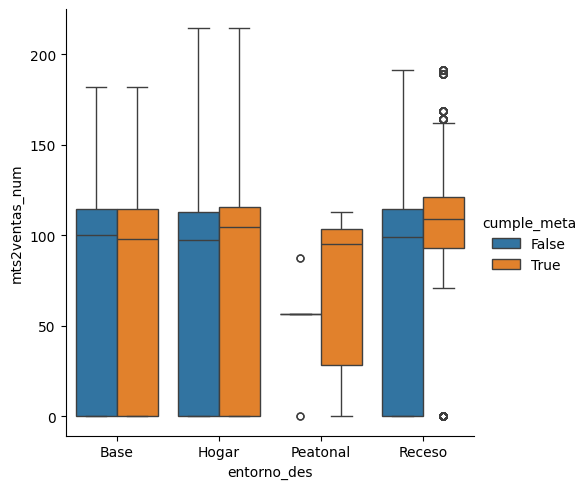

In [31]:
sns.catplot(data=df, x="entorno_des", y="mts2ventas_num", kind="box", hue='cumple_meta')
plt.show()

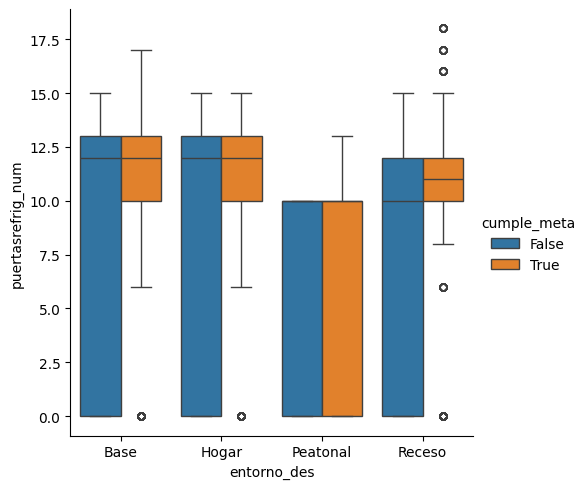

In [33]:
sns.catplot(data=df, x="entorno_des", y="puertasrefrig_num", kind="box", hue='cumple_meta')
plt.show()

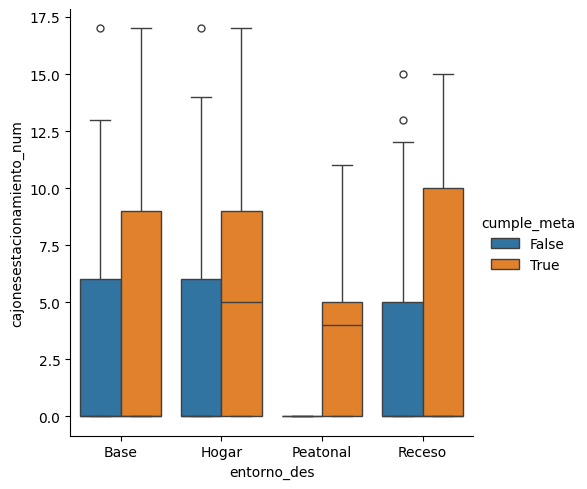

In [34]:
sns.catplot(data=df, x="entorno_des", y="cajonesestacionamiento_num", kind="box", hue='cumple_meta')
plt.show()

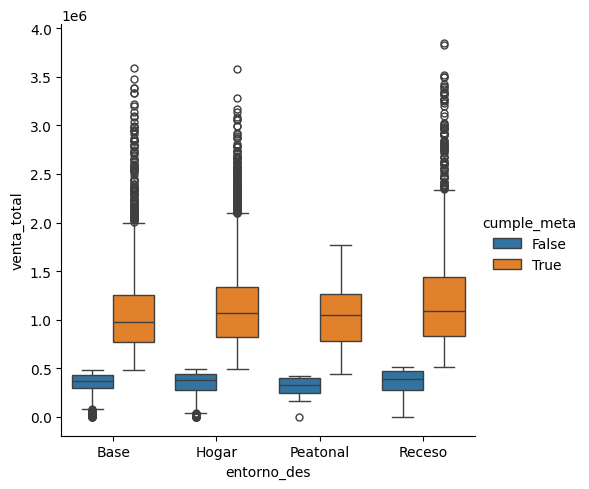

In [ ]:
sns.catplot(data=df, x="entorno_des", y="nivel", kind="box", hue='cumple_meta')
plt.show()

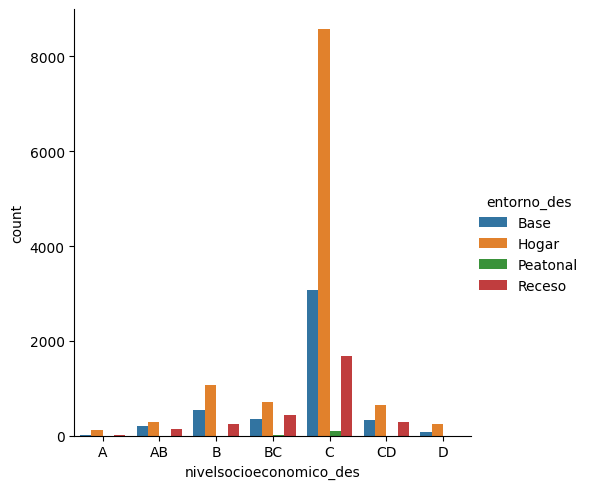

In [38]:
sns.catplot(data=df, x="nivelsocioeconomico_des", hue="entorno_des", kind="count")

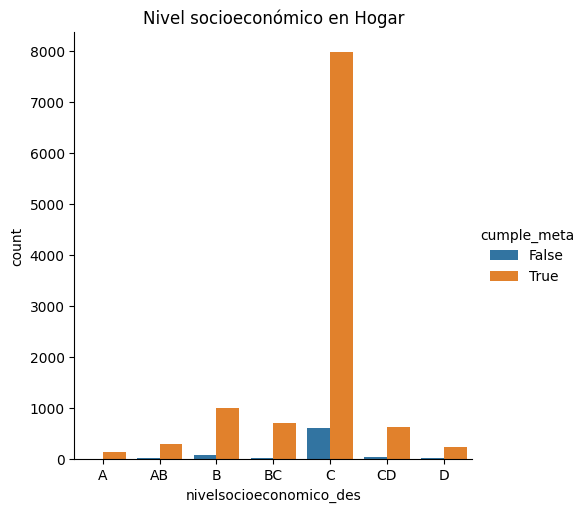

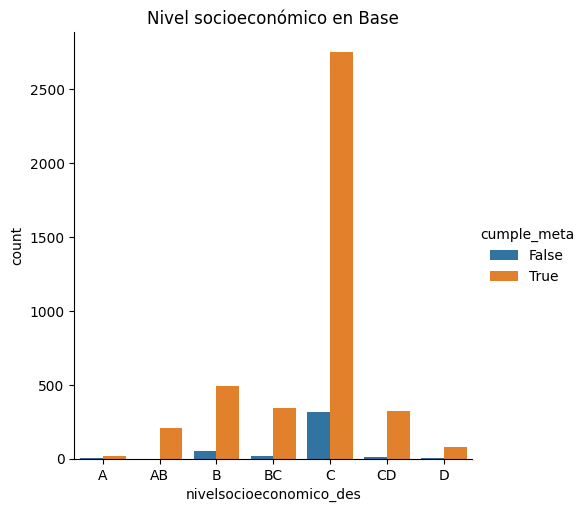

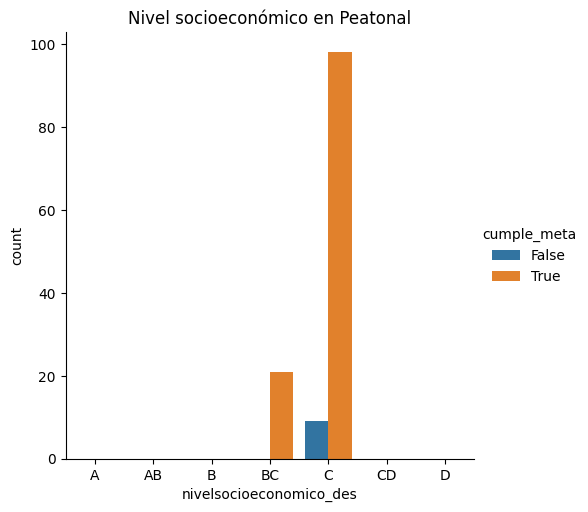

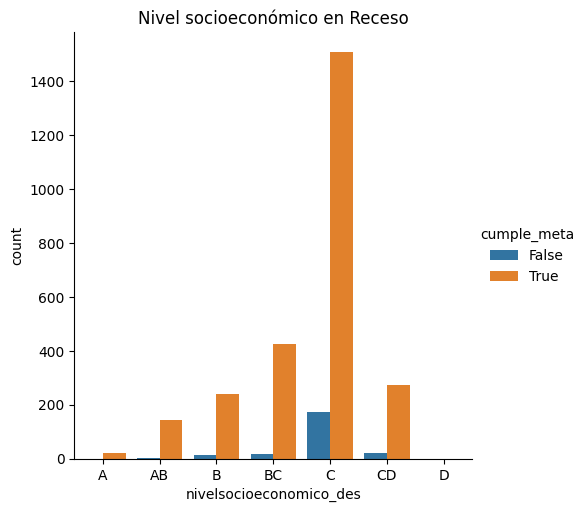

In [51]:
entornos = ['Hogar', 'Base', 'Peatonal', 'Receso']

for entorno in entornos:
    df_temp = df[df['entorno_des'] == entorno]
    sns.catplot(data=df_temp, x='nivelsocioeconomico_des', hue='cumple_meta', kind='count')
    plt.title(f'Nivel socioeconómico en {entorno}')
    plt.show()

### NOTES

- Ningún dato de los nulos de segmento maestro tienen cajones de estacionamiento. 
- El nivel socioeconómico más común es C en cualquier entorno